In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
data=pd.read_csv("C://Anaconda//datasets//insurance.csv")

In [59]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


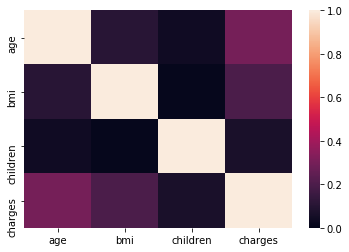

In [60]:
correl=data.corr()
corr = data.corr()
ax = sns.heatmap(corr, vmin=0,vmax=1)
# vmin,vmax specify limits of colourmap, center=0 can be added to 
# Plot a heatmap for data centered on 0 with a diverging colormap
# as observed, age and bmi determine charges while no. of children do not

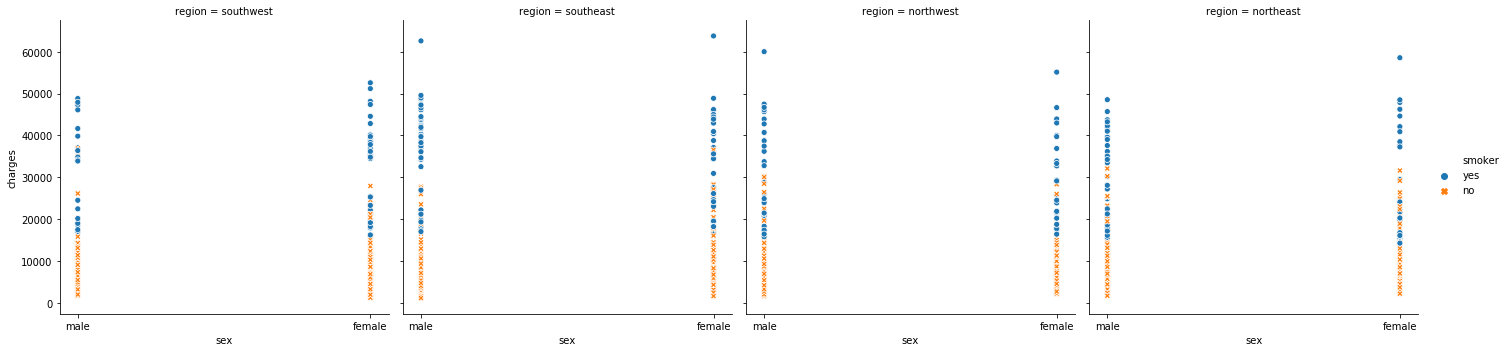

In [61]:
sns.relplot(x="sex", y="charges", col="region", hue="smoker", style="smoker",data=data);
# x-for x axis  y-y axis parameter   col-variable for which seperate graphs are obtained
# hue- color   style- variable determining style of marking   size-**optional variable determining size of marking 
# amongst the categorical variables, smokers(=yes) have higher charges with the other 2 being almost evenly distributed

In [62]:
# variables= age,bmi,smoker
y=data[['charges']]
x=data[['age','bmi','smoker']]
# for input and output variables

In [63]:
#converting smoker to numerical type in sample dataset for processing

num=LabelEncoder()
x['smoker']=num.fit_transform(x['smoker'].astype('str'))

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
x_train.head()
#splits data into training and test sets

,age,bmi,smoker
1279,25,26.790,0
667,40,32.775,1
99,38,19.300,1
1022,47,36.080,1
601,51,31.635,0


In [65]:
# Before calling the fucntion below,convert smoker from string to float
# this can be done using label encoder available in sklearn.preprocessing

regr = linear_model.LinearRegression()

#coverting input/ output to array
xtr = np.asanyarray(x_train[['age','bmi','smoker']])
ytr = np.asanyarray(y_train[['charges']])

regr.fit (xtr,ytr)

#coefficients corresponding to the three variables 
print ('Coefficients: ', regr.coef_)

Coefficients:  [[  265.36800863   317.77655428 23681.2736268 ]]


In [66]:
y_pred= regr.predict(x_test[['age','bmi','smoker']])  #predicted y values
xte = np.asanyarray(x_test)
yte = np.asanyarray(y_test)
print("Residual sum of squares: %.2f" % np.mean((y_pred - yte) ** 2))    #average loss over all training samples

#  ACCURACY = 75%
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 43709148.46
Variance score: 0.75


In [ ]:
#  The above code is an example of multiple linear regression an final accuracy comes out to be 75%
#  try other variations in dependencies for input variables as well